## 2019 November Cosmetic Store Dataset

In [2]:
import pandas as pd
import seaborn as sns

In [6]:
df_cos = pd.read_csv('/Volumes/Sadhguru/2019-Nov_cosmetic.csv')

In [7]:
df_cos.head() #can visually see different data values and columns in the start of file

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


In [8]:
df_cos.shape #total dimension of the dataset

(4635837, 9)

In [9]:
df_cos.info() #different data types of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635837 entries, 0 to 4635836
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 318.3+ MB


In [38]:
df_cos['price'].describe() #as the mean is not nearly the same as median, the data is skewed distributed

count    4.635837e+06
mean     8.120701e+00
std      1.879197e+01
min     -7.937000e+01
25%      1.940000e+00
50%      3.970000e+00
75%      6.350000e+00
max      3.277800e+02
Name: price, dtype: float64

In [39]:
df_cos.nunique() #unique values in all columns. number of\
#unique user sessions is higher than user id, implying on average a single user have more than one sessions

event_time       1810735
event_type             4
product_id         43419
category_id          491
category_code         10
brand                239
price               2538
user_id           368232
user_session      942022
dtype: int64

In [12]:
df_cos['user_id'].value_counts() #unique values of user_id column. the user with user ID 527021202\
#has most number of activity

527021202    11720
550388516     4181
500179293     3665
552908674     3375
467810091     2946
             ...  
571545314        1
571545695        1
571545691        1
571545800        1
579969854        1
Name: user_id, Length: 368232, dtype: int64

In [14]:
df_cos['brand'].count() # non-null values. Siginificant portion of values is null

2649808

In [15]:
df_cos['brand'].size #all values (total rows)

4635837

In [16]:
c = df_cos.corr()

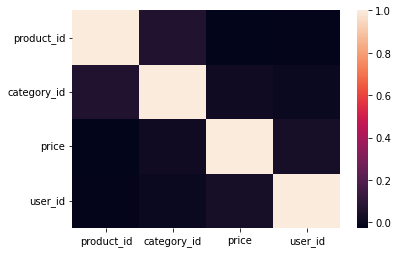

In [17]:
ax = sns.heatmap(c) #the data is not correlated

In [18]:
df_cos['category_code']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
4635832    NaN
4635833    NaN
4635834    NaN
4635835    NaN
4635836    NaN
Name: category_code, Length: 4635837, dtype: object

In [19]:
df_cos['category_code'].isna().sum() #significant amount of null values

4560089

In [20]:
df_cos['brand'].isna().sum() #significant amount of null values

1986029

In [21]:
df_cos['event_type'].isna().sum() #no null values for event type

0

In [42]:
df_cos['event_time'].isna().sum() #no null values for event time

0

In [43]:
df_cos['event_time'].tail() #data till 30th November 2019.

4635832    2019-11-30 23:59:46 UTC
4635833    2019-11-30 23:59:47 UTC
4635834    2019-11-30 23:59:47 UTC
4635835    2019-11-30 23:59:57 UTC
4635836    2019-11-30 23:59:58 UTC
Name: event_time, dtype: object

### Insights from 2019 November Cosmetic Dataset

1) There are two useful columns with significant null values: category_code and brand. <br />
2) Can remove the product_id and category_id columns as there no no further information of the categories and products.<br />
3) The data is skewed which could influence machine learning applications.<br />

Similar data exploration technique will be applied in further datasets.


## 2019 October Multicategory Store Dataset

In [22]:
df_octmult = pd.read_csv('/Volumes/Sadhguru/2019-Oct.csv',nrows=10000000) #total rows is 67501979. around 7 times more

In [23]:
df_octmult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 686.6+ MB


In [24]:
df_octmult.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [44]:
df_octmult['price'].describe()

count    1.000000e+07
mean     2.960614e+02
std      3.669101e+02
min      0.000000e+00
25%      6.525000e+01
50%      1.619100e+02
75%      3.618200e+02
max      2.574070e+03
Name: price, dtype: float64

In [26]:
df_octmult.nunique()

event_time        648713
event_type             3
product_id        121903
category_id          566
category_code        123
brand               2671
price              36122
user_id          1070614
user_session     2148765
dtype: int64

In [27]:
df_octmult['user_id'].value_counts()

512475445    1646
513605798    1212
516948072    1165
512365995    1006
513068111     950
             ... 
534328169       1
547460132       1
514914964       1
556921174       1
520417137       1
Name: user_id, Length: 1070614, dtype: int64

In [28]:
df_octmult['brand'].isna().sum()

1388005

In [29]:
df_octmult['category_code'].isna().sum()

3224119

### Insights from 2019 October Multicategory Store Dataset

1) There are two useful columns with significant null values: category_code and brand. <br />
2) Can remove the product_id and category_id columns as there no no further information of the categories and products.<br />
3) The data is comparitvely less skewed than the previous dataset.<br />
4) There are significant number of more data in this dataset. Therefore, only first 10000000 rows are used.




## 2020 April Multicategory Store Dataset

In [30]:
df_aprmult = pd.read_csv('/Volumes/Sadhguru/2020-Apr.csv',nrows=10000000) 

In [31]:
df_aprmult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 686.6+ MB


In [32]:
df_aprmult.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-04-01 00:00:00 UTC,view,1201465,2232732101407408685,apparel.shoes.slipons,samsung,230.38,568984877,e2456cef-2d4f-42b9-a53a-8893cb0c6851
1,2020-04-01 00:00:01 UTC,view,1307156,2053013554658804075,electronics.audio.headphone,apple,1352.67,514955500,38f43134-de83-4710-ae0a-326677d292c6
2,2020-04-01 00:00:01 UTC,view,1480477,2053013563835941749,appliances.kitchen.refrigerators,apple,1184.05,633645770,16aba270-b3c2-4b23-be0a-b7c80bc9da9e
3,2020-04-01 00:00:02 UTC,view,1307050,2053013554658804075,electronics.audio.headphone,apple,1724.34,564933778,05b443bd-e68a-4d72-b971-80bd31109cb8
4,2020-04-01 00:00:03 UTC,view,9500109,2232732104175649385,apparel.scarf,defender,25.05,530206135,e3c1fb4b-0a7e-457d-a0cf-5d1479e9aafc


In [45]:
df_aprmult['price'].describe()

count    1.000000e+07
mean     3.095589e+02
std      3.776898e+02
min      0.000000e+00
25%      6.433000e+01
50%      1.781200e+02
75%      4.012700e+02
max      2.574070e+03
Name: price, dtype: float64

In [34]:
df_aprmult.nunique()

event_time        539696
event_type             3
product_id        160631
category_id         1073
category_code        137
brand               3883
price              32086
user_id          1053859
user_session     1757976
dtype: int64

In [35]:
df_aprmult['user_id'].value_counts()

597644399    15064
619573377     2345
618674364     2195
550985043     2061
635214021     1811
             ...  
594888943        1
535532529        1
636500013        1
595247945        1
637799467        1
Name: user_id, Length: 1053859, dtype: int64

In [36]:
df_aprmult['brand'].isna().sum()

1202864

In [37]:
df_aprmult['category_code'].isna().sum()

952342

### Insights from 2020 April Multicategory Store Dataset

1) There are two useful columns with significant null values: category_code and brand. <br />
2) Can remove the product_id and category_id columns as there no no further information of the categories and products.<br />
3) The data is comparitvely more skewed than the previous dataset.<br />
4) There are significant number of more data in this dataset. Therefore, only first 10000000 rows are used.<br />
5) This dataset can be used in conjuction with 2019 Oct dataset for comparision purposed of 6-month difference in time. <br />
6) The dataset is nearly same in structure as of 2019 Oct Multicategory dataset except more number of rows.



